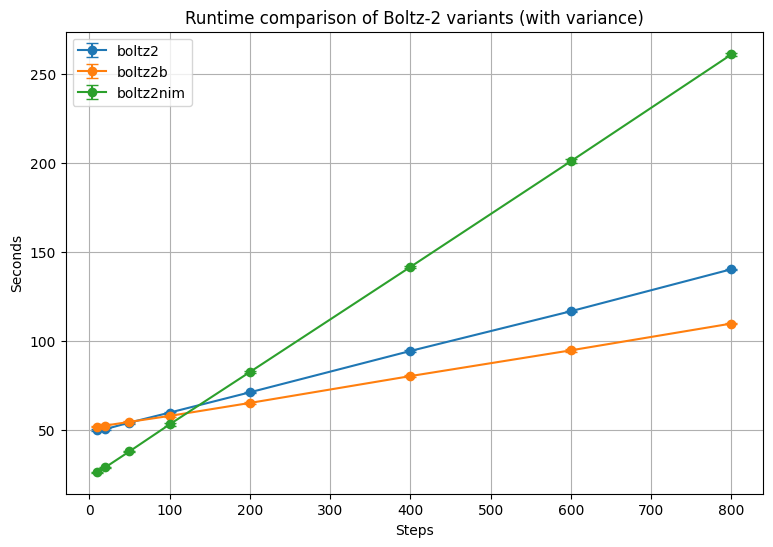

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_a = pd.read_csv("../results/seconds_boltz2.tsv", sep="\t")
df_b = pd.read_csv("../results/seconds_boltz2b.tsv", sep="\t")
df_c = pd.read_csv("../results/seconds_boltz2nim.tsv", sep="\t")

# Add a column to distinguish the variants
df_a["variant"] = "boltz2"
df_b["variant"] = "boltz2b"
df_c["variant"] = "boltz2nim"

# Combine all dataframes into one
df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Compute mean and standard deviation of runtime per step for each variant
agg = (
    df.groupby(["variant", "steps"])
    .agg(mean_seconds=("seconds", "mean"),
         std_seconds=("seconds", "std"))
    .reset_index()
)

# Plot with error bars
plt.figure(figsize=(9, 6))
for name, group in agg.groupby("variant"):
    plt.errorbar(group["steps"], group["mean_seconds"], 
                 yerr=group["std_seconds"], 
                 marker="o", capsize=4, label=name)

plt.xlabel("Steps")
plt.ylabel("Seconds")
plt.title("Runtime comparison of Boltz-2 variants (with variance)")
plt.legend()
plt.grid(True)
plt.show()
